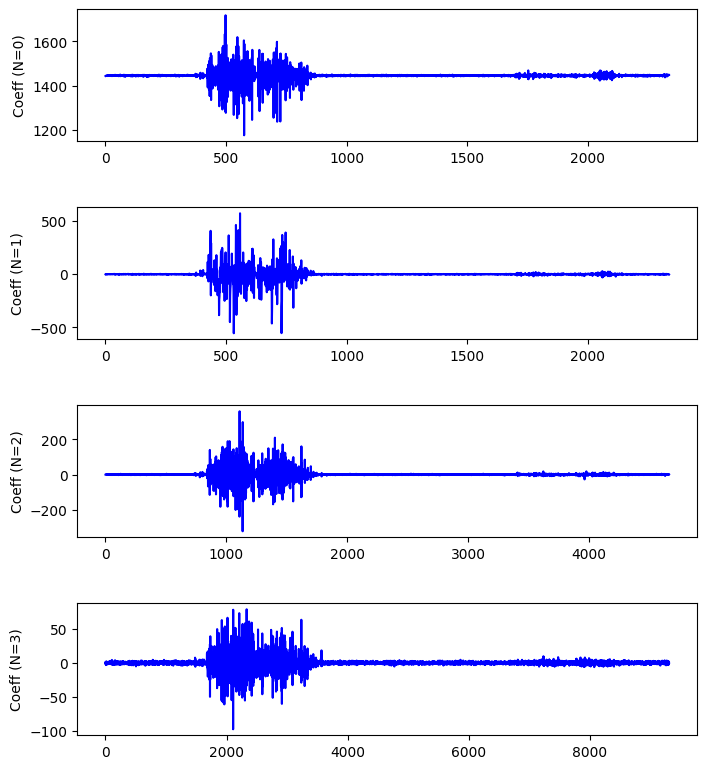

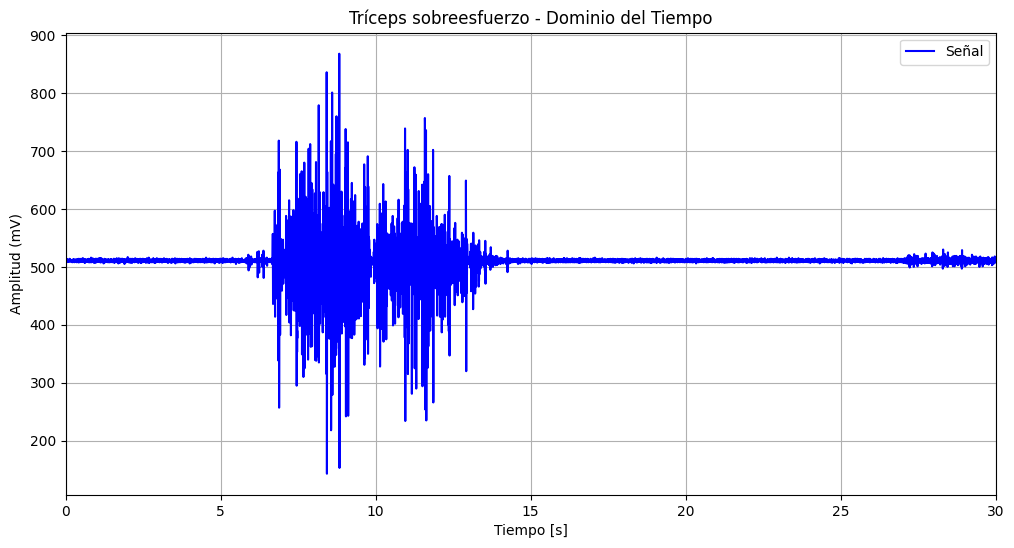

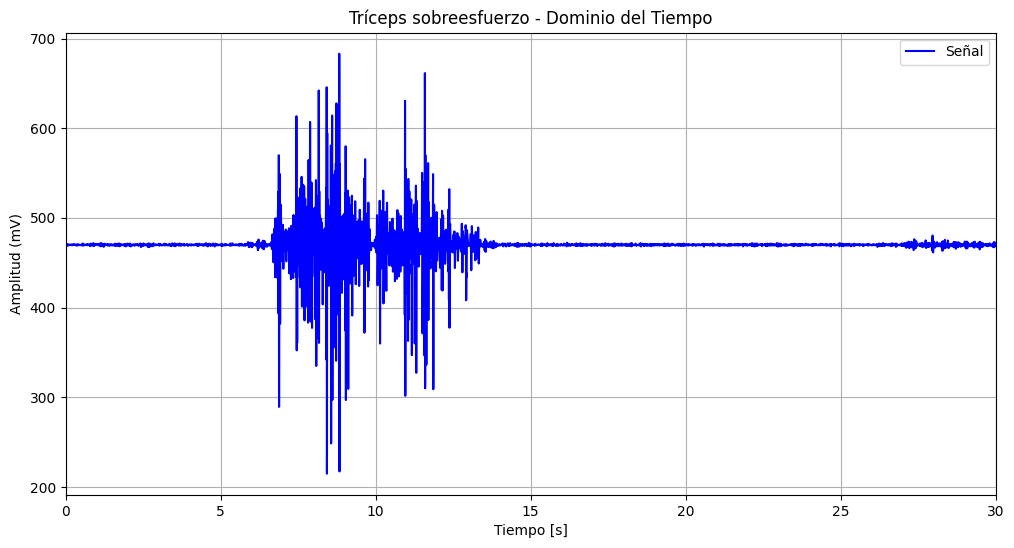

In [9]:
import numpy as np
import biosignalsnotebooks as bsnb
import matplotlib.pyplot as plt
import pywt
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax, mean
from scipy.fftpack import fft
from scipy.signal import welch
import os

# Cargar los datos desde el archivo
data = np.loadtxt("C:/Users/Joaquin/Desktop/Repositorio Señales/ISB-Grupo-5/Otros/Archivos_varios/Lab4_EMG/dedo_contrs.txt", comments='#',skiprows=4)

# Extraer la data
reposoD1 = data[:, 5]  # Columna 5 contiene la información necesaria

# Parámetros
fs = 500  # Frecuencia de muestreo en Hz
n = len(reposoD1)  # Número de muestras
t = np.linspace(0, n/fs, n, endpoint=False)  # Vector de tiempo

# Función para plotear la señal en el dominio del tiempo con anotaciones
def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t, signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(1, 15)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Aplicar la transformada wavelet
wavelet = 'sym8'  # Cambiado a db6 según lo sugerido en el trabajo de grado
level = 3
coeffs = pywt.wavedec(reposoD1, wavelet, level=level)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(8, 12))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff,color='b')
    plt.ylabel(f'Coeff (N={i})')

plt.subplots_adjust(hspace=0.5)

# Calcular el nivel de ruido y el nivel de la señal sobre la magnitud absoluta de la señal
noise_level = np.std(reposoD1)  # Estimación del nivel de ruido
n_samples = len(reposoD1)  # Estimación del nivel de la señal

# Manejo de excepciones para evitar RuntimeWarning si la señal no tiene variabilidad
threshold = noise_level * np.sqrt(2 * np.log(n_samples))

# Filtrar los coeficientes con el umbral calculado
filtered_coeffs = [pywt.threshold(coeff, threshold, mode='soft') for coeff in coeffs]

# Reconstruir la señal filtrada
filtered_signal = pywt.waverec(filtered_coeffs, wavelet)

# Ajustar la longitud de la señal filtrada al vector de tiempo
emg_signal = filtered_signal[:len(t)]

def plot_time_domain(signal, title, fs):
    plt.figure(figsize=(12, 6))
    plt.plot(t,signal, label='Señal', color='b')
    plt.title(f'{title} - Dominio del Tiempo')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.xlim(0, 30)  # Ajustar los límites de tiempo para mostrar un segmento relevante
    plt.ylim()
    plt.grid(True)
    
    plt.legend()
    plt.show()

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(reposoD1, 'Tríceps sobreesfuerzo', fs)

# Ploteo de la señal en el dominio del tiempo
plot_time_domain(emg_signal, 'Tríceps sobreesfuerzo', fs)

In [10]:
# Definir un umbral para detectar activaciones musculares
threshold = 433   # Ajusta según la señal
# Detectar los índices donde la señal supera el umbral (activaciones)
activation_indices = np.where(np.abs(emg_signal) > threshold)[0]

# Agrupar las activaciones consecutivas
activations = np.split(activation_indices, np.where(np.diff(activation_indices) != 1)[0] + 1)

# Filtrar activaciones muy cortas que podrían ser ruido
min_activation_length = 10  # Definir la longitud mínima de activación en muestras
filtered_activations = [act for act in activations if len(act) >= min_activation_length]

# Características de activación
activation_times = [(act[-1] - act[0]) / fs for act in filtered_activations]  # Tiempos de activación en segundos

# 1. Número de activaciones musculares
num_activations = len(activation_times)

# 2. Tiempo de activación máximo
max_activation_time = np.max(activation_times) if activation_times else 0

# 3. Tiempo de activación mínimo
min_activation_time = np.min(activation_times) if activation_times else 0

# 4. Tiempo de activación promedio
avg_activation_time = np.mean(activation_times) if activation_times else 0

# 5. Desviación estándar del tiempo de activación
std_activation_time = np.std(activation_times) if activation_times else 0

# Mostrar los resultados
print(f"Number of Muscular Activations: {num_activations}")
print(f"Maximum Activation Time: {max_activation_time:.4f} seconds")
print(f"Minimum Activation Time: {min_activation_time:.4f} seconds")
print(f"Average Activation Time: {avg_activation_time:.4f} seconds")
print(f"Standard Deviation Time: {std_activation_time:.4f} seconds")


Number of Muscular Activations: 53
Maximum Activation Time: 24.2720 seconds
Minimum Activation Time: 0.0200 seconds
Average Activation Time: 0.6832 seconds
Standard Deviation Time: 3.3995 seconds


In [11]:
# Calcular los parámetros
max_emg = np.max(emg_signal)
min_emg = np.min(emg_signal)
avg_emg = np.mean(emg_signal)
std_emg = np.std(emg_signal)

# Mostrar los resultados
print(f"Maximum EMG: {max_emg} mV")
print(f"Minimum EMG: {min_emg} mV")
print(f"Average EMG: {avg_emg} mV")
print(f"Standard Deviation EMG: {std_emg} mV")

Maximum EMG: 683.0331761633807 mV
Minimum EMG: 214.74268372622134 mV
Average EMG: 469.923754103823 mV
Standard Deviation EMG: 15.428613496443576 mV


In [12]:
# Calcular el valor medio absoluto (MAV)
MAV = np.mean(np.abs(emg_signal))

# Calcular Root Mean Square (RMS)
RMS = np.sqrt(np.mean(emg_signal ** 2))

# Calcular desviación estándar (SD)
SD = np.std(emg_signal)

# Calcular longitud de la forma de onda (Waveform Length, WL)
WL = np.sum(np.abs(np.diff(emg_signal)))

# Mostrar los resultados
print(f"Mean Absolute Value (MAV): {MAV}")
print(f"Root Mean Square (RMS): {RMS}")
print(f"Standard Deviation (SD): {SD}")
print(f"Waveform Length (WL): {WL}")

Mean Absolute Value (MAV): 469.923754103823
Root Mean Square (RMS): 470.1769632653784
Standard Deviation (SD): 15.428613496443576
Waveform Length (WL): 39168.85309774359


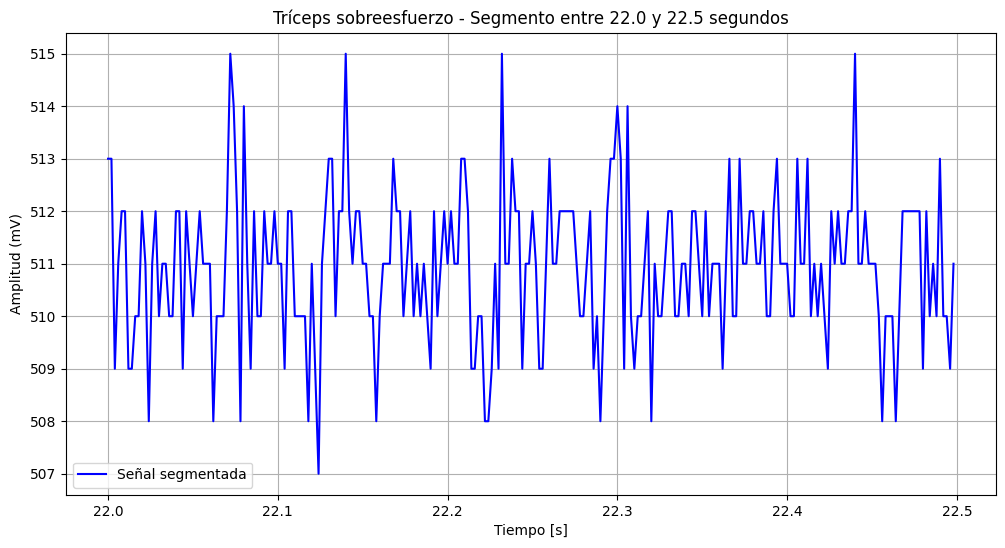

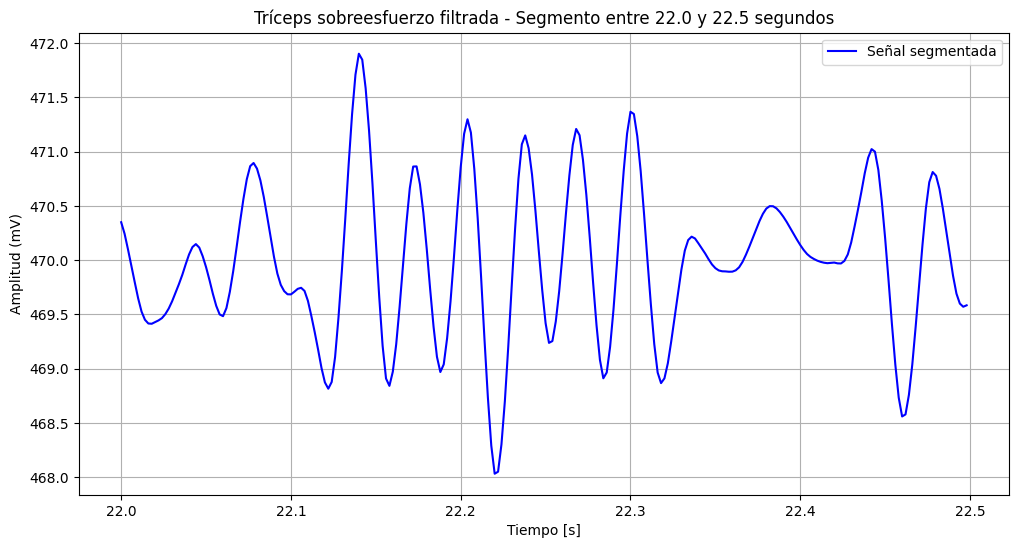

In [13]:
#SEGMENTACIÓN
# Intervalo de tiempo en segundos
start_time = 22.000
end_time = 22.500

# Convertir el tiempo a índices
start_index = int(start_time * fs)
end_index = int(end_time * fs)

# Segmentar la señal en el intervalo especificado
segment_reposoD1 = reposoD1[start_index:end_index]
segment_emg_signal = emg_signal[start_index:end_index]

# Vector de tiempo para el segmento
t_segment = t[start_index:end_index]

# Ploteo de la señal segmentada en el dominio del tiempo
def plot_segmented_time_domain(time, signal, title):
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label='Señal segmentada', color='b')
    plt.title(f'{title} - Segmento entre {start_time} y {end_time} segundos')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud (mV)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Ploteo de la señal original segmentada
plot_segmented_time_domain(t_segment, segment_reposoD1, 'Tríceps sobreesfuerzo')

# Ploteo de la señal filtrada segmentada
plot_segmented_time_domain(t_segment, segment_emg_signal, 'Tríceps sobreesfuerzo filtrada')

In [14]:
# Load of data
data, header = bsnb.load("C:/Users/Joaquin/Desktop/Repositorio Señales/ISB-Grupo-5/Otros/Archivos_varios/Lab4_EMG/dedo_contrs.txt", get_header=True)
channel = list(data.keys())[0]
device = header["device"]
resolution = int(header["resolution"][0])
resolution=10
# Sampling frequency and acquired data
fs = header["sampling rate"]
# Signal Samples
vals = bsnb.raw_to_phy("EMG", device, data[channel], resolution, option="mV") # Conversion to mV
time = linspace(0, len(vals) / fs, len(vals))


emg_detrend = (reposoD1 - mean(reposoD1))
burst_begin, burst_end = bsnb.detect_emg_activations(vals, fs, smooth_level=20, threshold_level=10, 
                                                   time_units=True, plot_result=True)[:2]

print('EMG Onset Points: ',burst_begin)
print('EMG Offset Points: ', burst_end)
print('Number of Muscular Activations: ', len(burst_begin))

# Bursts Duration
bursts_time = burst_end - burst_begin

# Parameter extraction
max_time = max(bursts_time)
min_time = min(bursts_time)
avg_time = average(bursts_time)
std_time = std(bursts_time)

duration_extract = {'Maximum Activation Time':max_time, 
                     'Minimum Activation Time':min_time, 
                     'Average Activation Time':avg_time, 
                     'Standard deviation Time':std_time}
for x in duration_extract:
    print(x, ': ',"{:.3f}".format(duration_extract[x]),'s')

# Maximum Value of EMG 
max_sample_value = max(emg_detrend)

# Minimum Value of EMG
min_sample_value = min(emg_detrend)

# Average and Standard Deviation
avg_sample_value = average(emg_detrend)
std_sample_value = std(emg_detrend)

emg_extract = {"Maximum EMG": max_sample_value, 
               "Minimum EMG": min_sample_value, 
               "Average EMG": avg_sample_value, 
               "Standard Deviation EMG": std_sample_value}
for x in emg_extract:
    print(x, ': ',emg_extract[x],'mV')

from scipy.integrate import cumtrapz
from scipy.signal import welch
# Root Mean Square
rms = sqrt(sum(emg_detrend * emg_detrend) / len(emg_detrend))

# Signal Power Spectrum
f, P = welch(emg_detrend, fs=fs, window='hanning', noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]

print ('Root Mean Square: ', rms,'mV')
print ('Total Power: ', total_power)
print ('Median Frequency: ', median_freq,'Hz')
print ('Maximum Power Frequency: ', f_max, 'Hz')
bsnb.plot_emg_spect_freq(f, P, f_max, median_freq)

EMG Onset Points:  [3.31517824]
EMG Offset Points:  [6.43434593]
Number of Muscular Activations:  1
Maximum Activation Time :  3.119 s
Minimum Activation Time :  3.119 s
Average Activation Time :  3.119 s
Standard deviation Time :  0.000 s
Maximum EMG :  357.1253830851121 mV
Minimum EMG :  -367.8746169148879 mV
Average EMG :  2.402222013258514e-15 mV
Standard Deviation EMG :  26.121500577931986 mV
Root Mean Square:  26.121500577931986 mV
Total Power:  701.8149343416566
Median Frequency:  109.375 Hz
Maximum Power Frequency:  117.1875 Hz


In [15]:
bsnb.emg_parameters(vals, fs, raw_to_mv=True)

{'Number of Muscular Activations': 1,
 'Maximum Muscular Activation Duration': 18.19997849346739,
 'Minimum Muscular Activation Duration': 18.19997849346739,
 'Average Muscular Activation Duration': 18.19997849346739,
 'Standard Deviation of Muscular Activation Duration': 0.0,
 'Maximum Sample Value': -1.49,
 'Minimum Sample Value': -1.50005394988301,
 'Average Sample Value': -1.4985516558533498,
 'Standard Deviation Sample Value': 0.003519401202621966,
 'RMS': 1.4985557885663257,
 'Area': -27871.56579887217,
 'Total Power Spect': 1.1929705618037826e-05,
 'Median Frequency': 191.40625,
 'Maximum Power Frequency': 58.59375}